# Discrete to Continuous

In [74]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import seaborn as sns
from typing import *
%matplotlib inline

In [2]:
def seed_all(seed: int = 1992) -> None:
    """Seed all random number generators."""
    print(f"Using Seed Number {seed}")

    # os.environ["PYTHONHASHSEED"] = str(seed)  # set PYTHONHASHSEED env var
    np.random.seed(seed)  # numpy pseudo-random generator
    random.seed(seed)  # built-in pseudo-random generator

In [3]:
seed_all()

Using Seed Number 1992


## Probability at a point is 0

## Probability Density

This example below is modified from a problem set in Singapore's Junior College notes.

The masses of 200 six-month-old babies are collected. To visualise the distribution of the 
mass of a six-month old baby (which is a continuous random variable), let us for a moment
treat this 200 data points as the probability distribution[^empirical] of all the babies' 
masses.

Then, we can say that $X$ is a random variable that represents the mass of a (randomly drawn) baby.

[^empirical]: Even though this is the empirical distribution (observed, collected data) from
the true population (PDF), we will assume that these 200 data points is our true population
since I am trying to understand PDF.

We can then group the data into 5 classes with a class width of 1 kg each. The frequency table and the histogram 
corresponding to the data ({numref}`baby_frequency_1`) are shown below.

```{list-table}
:header-rows: 1
:name: table:baby_frequency_1

* - $x$, Mass (kg)
  - $5 \leq x < 6$
  - $6 \leq x < 7$
  - $7 \leq x < 8$
  - $8 \leq x < 9$
  - $9 \leq x \leq 10$
* - Frequency, $f$
  - 20
  - 48
  - 80
  - 36
  - 16
```

In [4]:
# generated bins of data from 5-10
bin_56 = np.random.uniform(5, 6, 20)
bin_67 = np.random.uniform(6, 7, 48)
bin_78 = np.random.uniform(7, 8, 80)
bin_89 = np.random.uniform(8, 9, 36)
bin_910 = np.random.uniform(9, 10, 16)
population = np.concatenate((bin_56, bin_67, bin_78, bin_89, bin_910))

If we plot out their histograms with bin size of 1, from 5-10 inclusive, we recover
the following histogram. 

In the frequency histogram on the left, we can say that,

- 20 babies with mass between 5 and 6;
- 48 babies with mass between 6 and 7;
- 80 babies with mass between 7 and 8;
- 36 babies with mass between 8 and 9;
- 16 babies with mass between 9 and 10.

In the relative frequency in the middle, we can say that, 

- $\frac{20}{200} = 0.1$ babies with mass between 5 and 6;
- $\frac{48}{200} = 0.24$ babies with mass between 6 and 7;
- $\frac{80}{200} = 0.4$ babies with mass between 7 and 8;
- $\frac{36}{200} = 0.18$ babies with mass between 8 and 9;
- $\frac{16}{200} = 0.08$ babies with mass between 9 and 10.

In the density histogram on the right, we first define the density histogram
so that the area of each rectangle in the histogram is equal to the relative frequency.
In other words, the width $w$ (interval) of each bin multiply by the height $h$ (density)
gives the area of the rectangle, and consequently the relative frequency of the bin. 
So to recover the density value $h$, we divide the relative frequency by the width $w$.

- $\frac{20}{200} / 1 = 0.1$ babies with mass between 5 and 6;
- $\frac{48}{200} / 1 = 0.24$ babies with mass between 6 and 7;
- $\frac{80}{200} / 1 = 0.4$ babies with mass between 7 and 8;
- $\frac{36}{200} / 1 = 0.18$ babies with mass between 8 and 9;
- $\frac{16}{200} / 1 = 0.08$ babies with mass between 9 and 10.

In this case the density histogram is the same as the relative frequency histogram, which 
is not the case in general (we will see later).

In [78]:
def plot_histogram(population: np.ndarray, bins: int, show_labels: bool = True, save: bool = False) -> None:
    """Plots histogram of population data for baby mass in kg."""
    fig, axes = plt.subplots(1, 3, figsize=(30, 6))

    values, bins, bars = axes[0].hist(
        population,
        density=False,
        bins=bins,
        color="#0504AA",
        alpha=0.5,
        edgecolor="black",
        linewidth=1,
    )

    axes[0].bar_label(bars, fontsize=10, color="navy")
    axes[0].set_xlabel("Mass (kg)")
    axes[0].set_ylabel("Frequencies")
    axes[0].set_title("Frequencies of Baby Mass.")

    values, bins, bars = axes[1].hist(
        population,
        density=False,
        bins=bins,
        color="#0504AA",
        alpha=0.5,
        edgecolor="black",
        linewidth=1,
        weights=np.ones_like(population)
        / len(population),  # this allows matplotlib to show as relative frequency
    )

    axes[1].bar_label(bars, fontsize=10, color="navy")
    axes[1].set_xlabel("Mass (kg)")
    axes[1].set_ylabel("Relative Frequencies")
    axes[1].set_title("Relative Frequencies of Baby Mass.")

    values, bins, bars = axes[2].hist(
        population,
        density=True,
        bins=bins,
        color="#0504AA",
        alpha=0.5,
        edgecolor="black",
        linewidth=1,
    )

    axes[2].bar_label(bars, fontsize=10, color="navy")
    axes[2].set_xlabel("Mass (kg)")
    axes[2].set_ylabel("Density")
    axes[2].set_title("Density Histogram of Baby Mass.")
    
    if save:
        fig.savefig('plot.png', dpi=300)

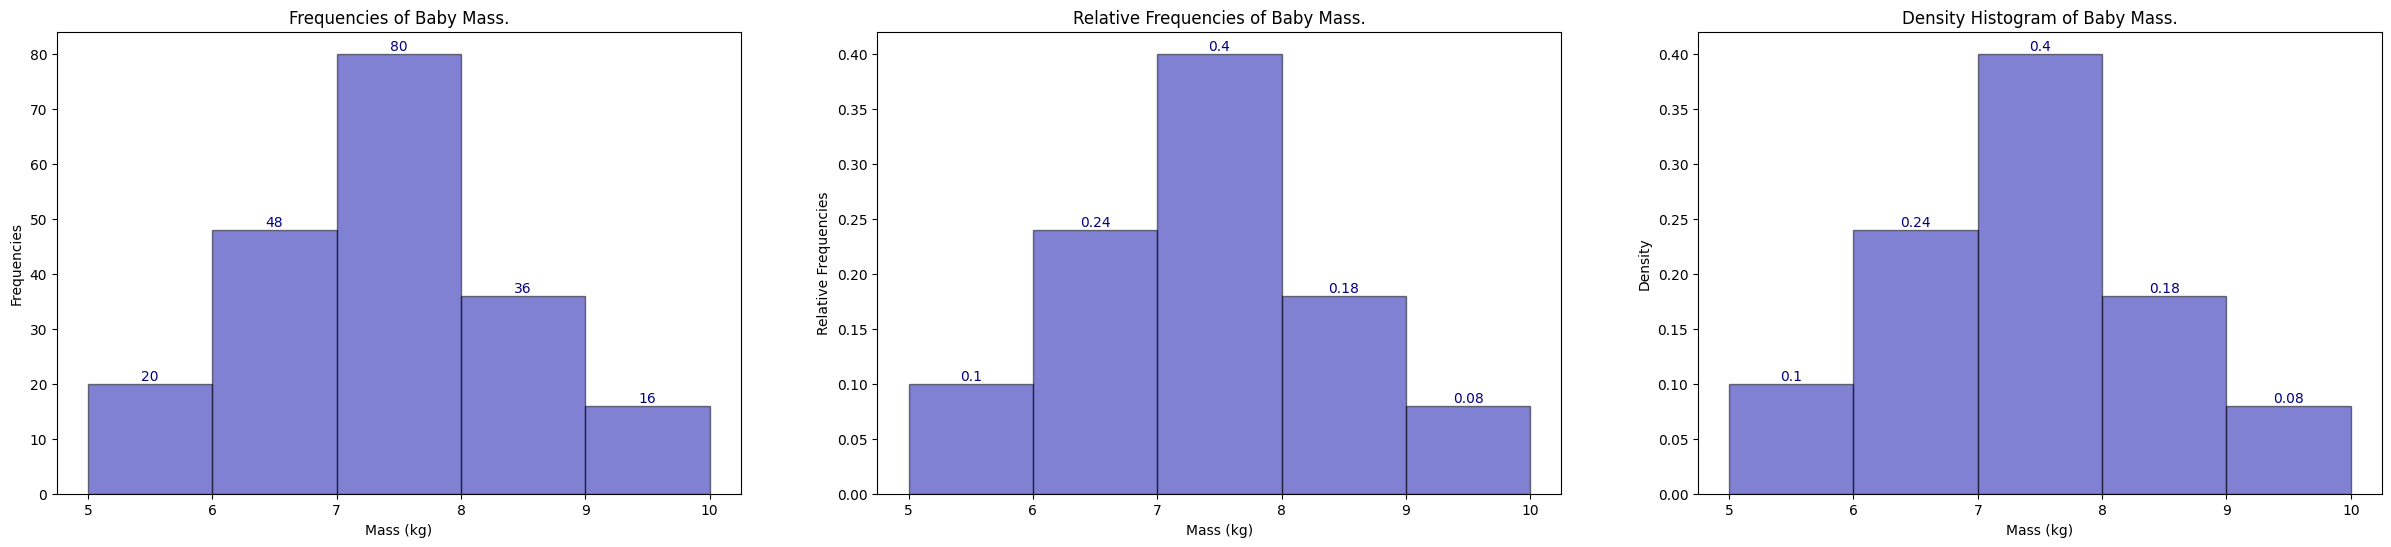

In [79]:
bin_interval = 1
bin_start = 5
bin_end = 10 + bin_interval

bins = np.arange(bin_start, bin_end, bin_interval)
plot_histogram(population, bins, save=False)

We try to link back how a density histogram can connect to PDF and its integral. Let $X$ be the continuous random variable defined earlier.

1. The area under a density histogram is 1, this follows because the relative histogram must add to 1.
2. The area represents how dense the population is at that particular interval/bin. The larger the area, the denser the population is (think density).
3. For each interval/bin, the area inside that rectangle is simply the relative frequency (i.e. $\text{width of interval} \times \text{density}$).
4. Therefore, we can think of it this way, the area inside each interval/bin is the probability of $X$ being in that interval.
5. Consequently, we can define $\mathbb{P} [a < X \leq b]$ to be the area inside the interval between point a and b, i.e. $\mathbb{P} [a < X \leq b] = (b-a) \times \text{density}$

Note we defined this without the usage of integrals.

Now this definition seems quite coarse because we are only restricted with a fixed interval, i.e. bins 5-10 with only 1 width, and 
we can only find cases for these discretized bins.

What if we want to find $\mathbb{P}[5 < X < 5.25]$? Well, we can discretize our bins further to have 0.25 intervals (width)!

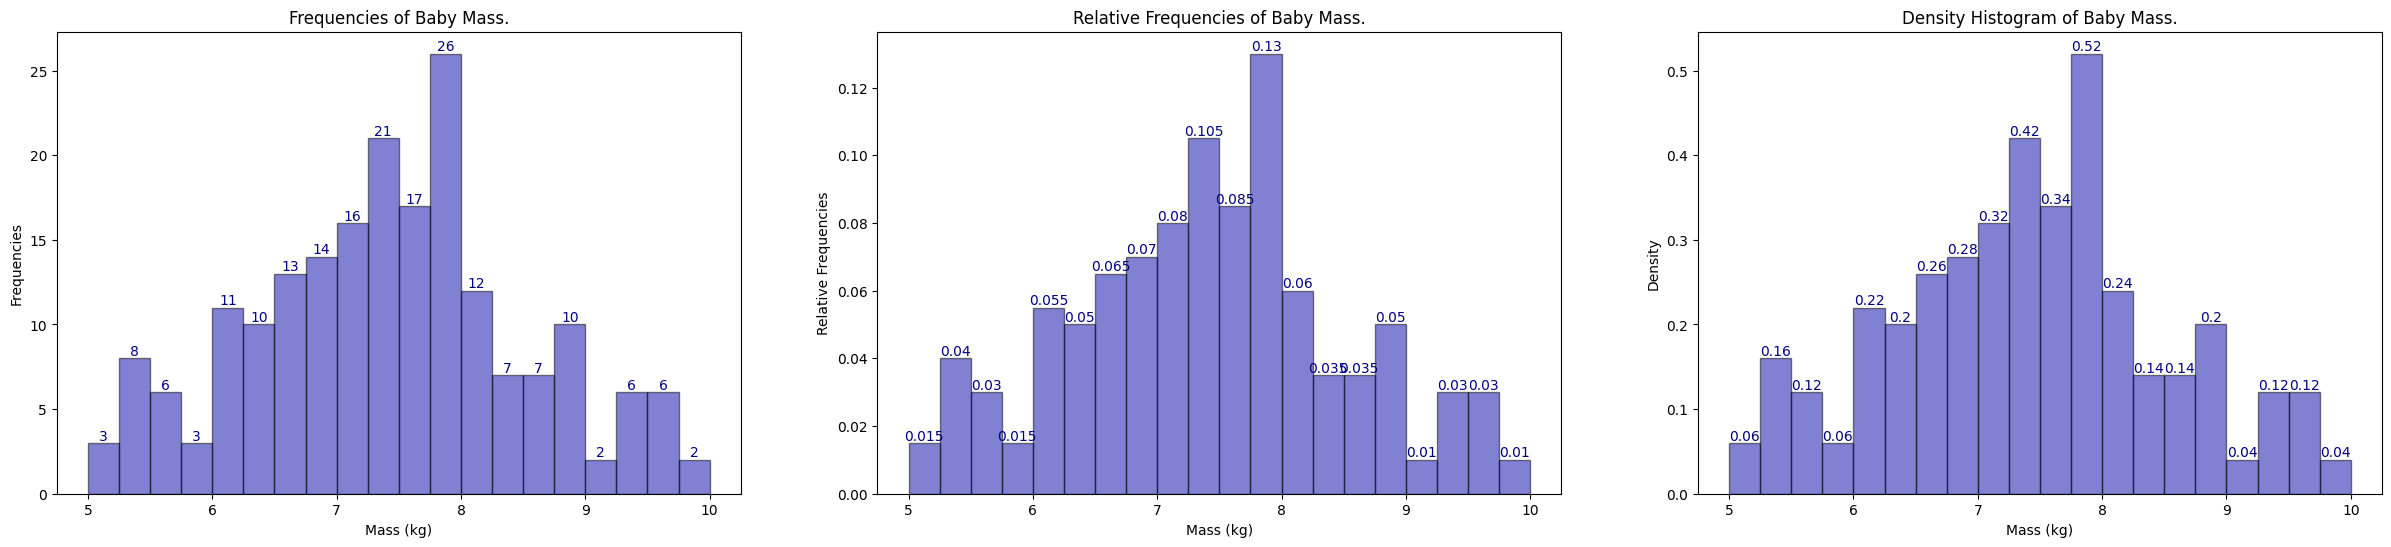

In [83]:
bin_interval = 0.25
bin_start = 5
bin_end = 10 + bin_interval

bins = np.arange(bin_start, bin_end, bin_interval)
plot_histogram(population, bins, save=False)

Before we move on, we take note that in the relative frequency diagram, the y-labels must sum to 1, but this
will not be true here in the density diagram. Recall relative frequency is density multiplied by bin width (i.e. in 
the bin 5 to 5.25, we have $0.06 \times 0.25 = 0.015$.

Now the problem is that all the bins are discretized, and hence does not fit the definition of continuous, we can keep ask for a smaller interval on the real line 
(i.e. what is $\mathbb{P}[5.00000001 < X \leq 5.00000002]$). Then we have to keep shrink the bin width to recover the area of the rectangle in order to
recover the relative frequency (probability).

Define the number of bins to be $k$, and the width of a bin to be $\frac{5}{k}$ where $5$ is $10 - 5$, 
then we can solve this problem by letting $k \to \infty$, this will eventually smooth out the whole
histogram into infinitely number of bins and recover a smooth function $f$, which turns out to be our PDF.

We can simply use `seaborn` to plot both a histogram and kde (with its distribution smoothed).

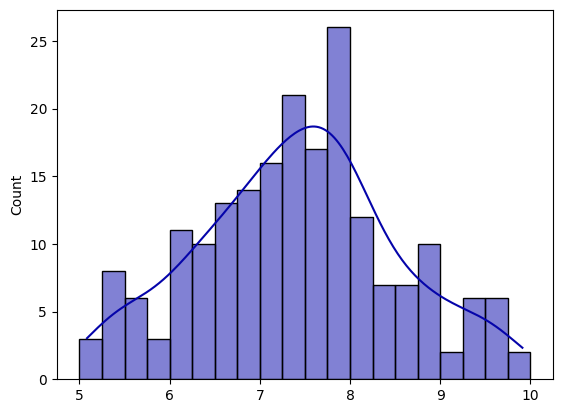

In [87]:
# for the same 20 bins
bin_interval = 0.25
bin_start = 5
bin_end = 10 + bin_interval

bins = np.arange(bin_start, bin_end, bin_interval)  # 20 bins

sns.histplot(
    population, kde=True, bins=bins, color="#0504AA", alpha=0.5, edgecolor="black"
)
# plt.savefig("sns_plot.png", dpi=300)

We now ask, what exactly does PDF mean at a point $x$ mean, in other words, if $f_X(x)$ is not the probability, then
what is it? We established that the probability at a point $x$ is $0$, because integrating over a point (line) gives 0 (also can prove by contradiction
by summing up infinite number of bins).

But to me it does not make sense if this number has no meaning. The textbook says that $f_X$ at a point
$x$ is the "probability mass per unit length[^unit_length] around $x$ within a small neighbourhood $\delta$".

This means that if we define an infinitesimally small interva epsilon $\delta$ around $x$ (here we would just use $x^{+}$) to $x$,
we have an interval $(x, x+\delta]$. We then ask ourselves the probability between
this interval, which is $\mathbb{P}[x < X \leq x + \delta]$.

Now recall we have showed earlier that we can approximately interpret integration as sums, and this is now connected to the histograms
we plotted. If the interval/bin width is very small, then we can say that the probability of this interval is 
$\mathbb{P}[x < X \leq x + \delta] \approx \delta f_X(x)$. Note carefully that the interval must be small,
if not the "area" won't be close to the probability as seen in {numref}`mit1805_integration_modified`.

Rearranging will get me:

$$
\mathbb{P}[x < X \leq x + \delta] \approx \delta f_X(x) \implies f_X(x) \approx \dfrac{\mathbb{P}[x < X \leq x + \delta]}{\delta}
$$

Then we can see that the PDF at a point $x$ is the **probability** per **delta**, which translates to the probability mass per unit length around $x$
within the small neighbourhood $\delta$. One can think of it as how densely packed $f_X$ is around the point $x$, if 
$f_X(x)$ turns out to be larger than the rest, this means that the probability of occurring at that point (and its neighbourhood)
is larger than the rest. More concretely, for the same interval length $\delta$, a larger $f_X$ means the probability is higher.

Furthermore, the probability density function can be greater than 1, as long as it obeys that the area under the curve is 1.

Note that the above did not mention about the definition of $f_X$ in terms of integrals, we complete the intuiton as follows:

$$
\mathbb{P}(x \le X \le x+\delta) = \int_x^{x+\delta} f_X(x) \, dx \approx \delta f_X(x) \approx dx f_X(x)
$$


[^unit_length]: This means per 1 unit.

```{figure} ../assets/mit1805_integration_modified.png
---
name: mit1805_integration_modified
---
Notice that in the last interval, the interval is too large and therefore the approximation is not good. The one
shaded with red is the actual area under the curve between the interval $[x_{n-1}, x_{n}$ where as the 
rectangle area (includes the green line) will over approximate.
```